## Fábrica WestRock - Líder em embalagens de papel 
Foi utilizado o capítudo 10.2 da AP42 por apresentar atividade mais similar ao escopo do emprendimento (Chemical Wood Pulping). 

Os 4 processos principais utilizados na polpação química são kraft, sulfite, semiquímico sulfite neutro (NSSC) e soda, os três primeiros apresentam o maior potencial de causar poluição do ar. 

O processo kraft sozinho responde por mais de 80% da polpa química produzida nos Estados Unidos, escolhemos esse processo para representar a poluição causada pela fabrica WestRock do município de Três Barras.



## Fatores de emissão para a polpação kraft em cada processo 
Nessa sessão planilhamos os fatores de emissão segundo dados AP42 

In [19]:
# Utilizando Pandas para abrir a planilha
import pandas as pd
import os

# Coletando o caminho da pasta que estou, diretório de trabalho atual, o qual o script Python está sendo executado
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)

# Indicando nome do arquivo da tabela 
chapterNumer = 10
subChapter = 2
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\'+file)

print(fe)

C:\Users\Carlos Suganuma - VB\Documents\GitHub\ENS5173_202401\tabelas\FE
chp_10_2.csv
                 Source     MP   SO2    CO
0                  DRBT    0.0  0.00  0.00
1                   BSW    0.0  0.00  0.00
2                   MEE    0.0  0.00  0.00
3       Recovery boiler  115.0  0.00  5.50
4                   SDT    3.5  0.10   NaN
5             Lime kiln   28.0  0.15  0.05
6  Turpentine condenser    0.0  0.00  0.00


## Plotando os fatores de emissão

Nessa sessão foi plotado um gráfico comparando a emissão de poluentes dos diferentes processos, levando em conta uma taxa de atividade para o empreendimento. 

Segundo artigos presentes nos links abaixo, consideramos uma taxa de atividade de 2025 toneladas por dia, esse número refere-se a produção da fábrica de Três Barras depois da sua ampliação, que aumentou em 45% a produtividade da unidade.

https://amanha.com.br/categoria/negocios-do-sul1/westrock-quer-fazer-da-unidade-de-sc-a-mais-produtiva-do-mundo-em-papel-kraft 

https://fiesc.com.br/pt-br/imprensa/o-papel-decolou



Source    DRBTDRBTDRBTDRBTDRBTDRBTDRBTDRBTDRBTDRBTDRBTDR...
MP                                                 296662.5
SO2                                                  506.25
CO                                                 11238.75
dtype: object
1
2
3


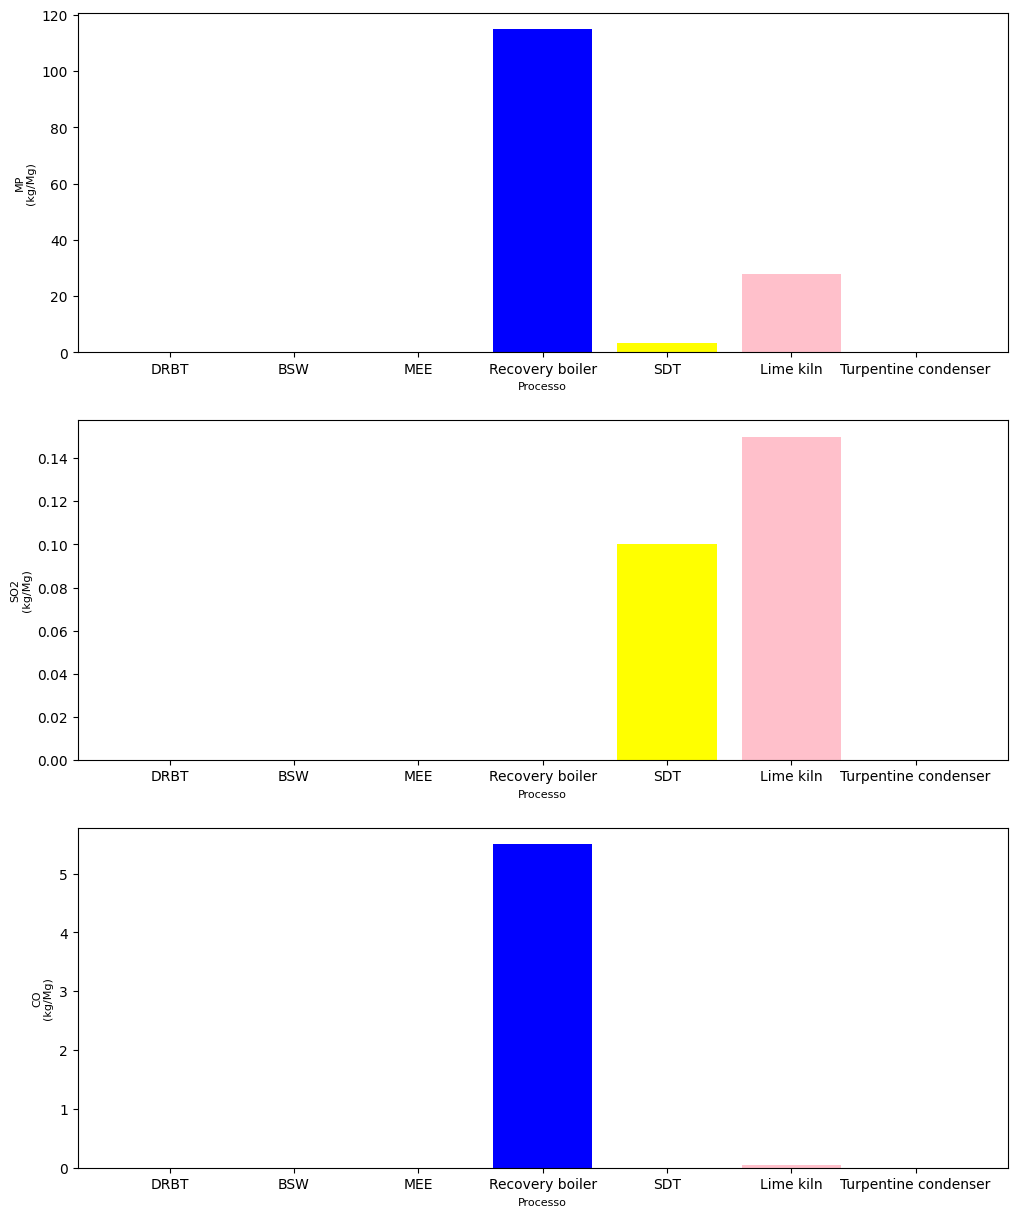

In [45]:
# importando matplotlib para criar os gráficos
import matplotlib.pyplot as plt

# Considerando uma taxa de atividade com base 
atv = 2025
emis = fe*atv

#somando dataframe
print(emis.sum())

#Criando a figura com matplotlib, gráficos
#subplots com número de linas igual ao número de poluentes 

#sharex significa compartilhar o eixo x 
fig,ax = plt.subplots(len(fe.columns)-1,1, figsize=(12,15))

#loop para preencher o suplot com os gráficos de barra 
for ii in range(1,len(fe.columns)):
    print(ii)
    ax[ii-1].bar(fe['Source'], fe.iloc[:,ii],color = ['blue','yellow','pink'])
    ax[ii-1].set_xlabel('Processo',fontsize=8)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(kg/Mg)', fontsize=8) 
    
#salvar a figura do gráfico na pasta figures 
#fig.savefig(cwd+'\\figures\\barplot_fator')  

#fig,ax = plt.subplots()
#emis.plot.bar(ax=ax,x='Source')

## Criando taxa de atividade aleatória 

Nesta sessão nós criamos uma taxa de atividade para empreendimento, com uma componente aleatória entre o mínimo e máximo. 

Para o máximo consideramos a fábrica atuando após a ampliação com seu potencial aumentado em 50%, já para o mínimo consideramos a empresa atuando antes da reforma. 

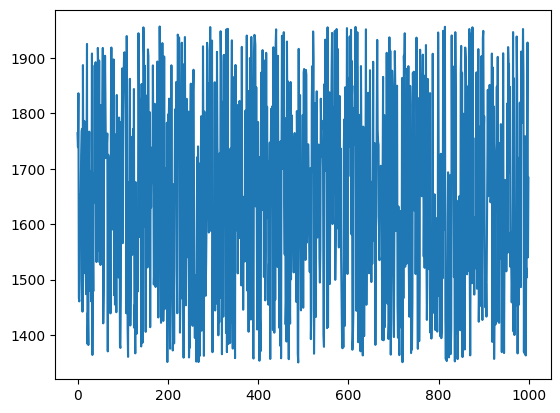

In [22]:
# Criando vetor de valores aleatórios
import numpy as np
atvMax = 1350*1.5
atvMin = 1350
n = 1000
atv = (atvMax-atvMin)*np.random.rand(n) + atvMin

# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(atv)

## Taxa de Atividade aleatória com sazonalidade
Nessa foi estimado a variabilidade sazonal da atividade da fábrica, adicionando também a aleatoriadade na taxa

## Criando dataframe com datas e valores de atividade aleatória

In [53]:
# Ajustando números aleatórios com base no comprimento do valor de datas
# Extraindo o número de linhas/ número de datas 
# Aceitando vetor de datas 
import pandas as pd 
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

#criando DataFrame com as datas 
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month

# Extrair o dia do ano das datas e adicioná-lo como uma nova coluna no DataFrame
# Considerando o dia um ordinal do ano 'dayofyear'
df['Dia_do_Ano'] = df['Data'].dt.dayofyear 

# Mostrar o DataFrame resultante
print(df)


          Data  Mes  Dia_do_Ano
0   2024-01-01    1           1
1   2024-01-02    1           2
2   2024-01-03    1           3
3   2024-01-04    1           4
4   2024-01-05    1           5
..         ...  ...         ...
361 2024-12-27   12         362
362 2024-12-28   12         363
363 2024-12-29   12         364
364 2024-12-30   12         365
365 2024-12-31   12         366

[366 rows x 3 columns]


In [54]:
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv
print(df)

# Salvar o DataFrame em um arquivo CSV
df.to_csv(r'C:\Users\Carlos Suganuma - VB\Documents\GitHub\ENS5173_202401\tabelas\FE\atv.csv')


          Data  Mes  Dia_do_Ano    atividade
0   2024-01-01    1           1  1552.045611
1   2024-01-02    1           2  1492.977800
2   2024-01-03    1           3  1512.517869
3   2024-01-04    1           4  1874.785279
4   2024-01-05    1           5  1662.122921
..         ...  ...         ...          ...
361 2024-12-27   12         362  1525.927880
362 2024-12-28   12         363  1652.330110
363 2024-12-29   12         364  1581.363762
364 2024-12-30   12         365  1679.951348
365 2024-12-31   12         366  1953.713553

[366 rows x 4 columns]


## Desenvolvendo componente sazonal
Propomos uma sazonalidade através da função cosseno

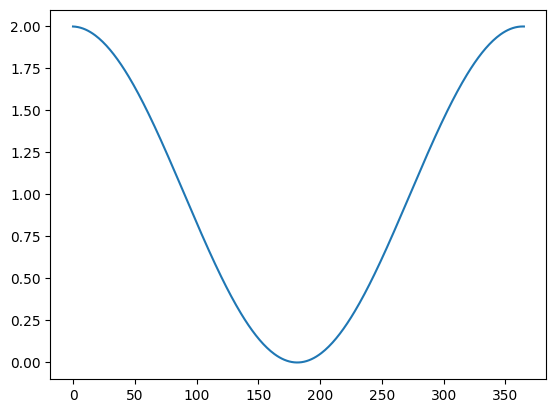

In [55]:
# transformando o vetor data em um angulo 
# adicionando 1 para a função ficar acima do eixo x, positiva 

#taxa de produção diária 
sazonalidade = np.cos((2*np.pi)*df['Dia_do_Ano']/365)+1
df['sazonalidade'] = sazonalidade 
plt.plot(sazonalidade)
df.to_csv(r'C:\Users\Carlos Suganuma - VB\Documents\GitHub\ENS5173_202401\tabelas\FE\atv.csv')


## Adicionando a componente aleátoria na variabilidade sazonal 


501022.0551353481


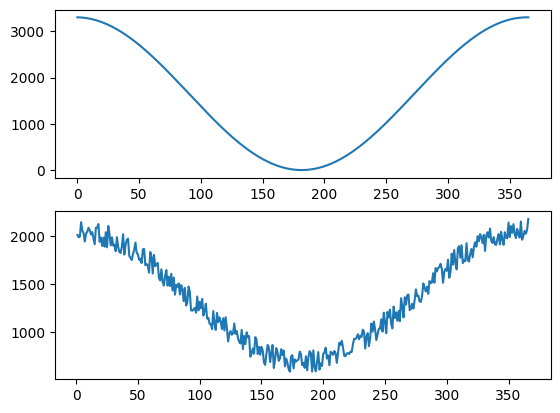

In [60]:

df['aleatorio'] =  (atvMax - atvMin)*np.random.rand(n) + atvMin

df['aleatorioSazonal'] = (df['atividade'] +  df['sazonalidade']*df['atividade'].mean())*0.415 
#o número foi escolhido através do metodo empirico, até encontrar um valor de média próxima a média anual

fig,ax= plt.subplots(2)

ax[1].plot(df['Dia_do_Ano'], df['aleatorioSazonal'])
ax[0].plot(df['sazonalidade']*df['atividade'].mean())
print(df['aleatorioSazonal'].mean()*365)

## Variabilidade na taxa de atividade para cada poluente
Nessa sessão foi criado três subplots para representar a emissão do forno de cal ao longo do ano para diferentes tipos de poluentes

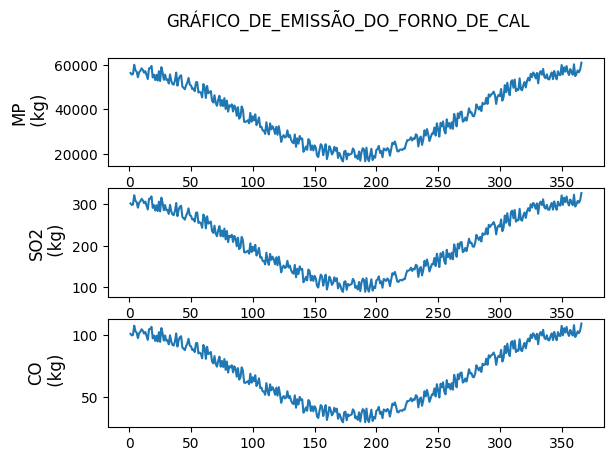

In [61]:
fig,ax= plt.subplots(3)
fig.suptitle('GRÁFICO_DE_EMISSÃO_DO_FORNO_DE_CAL')
for ii in range (1,4):
    ax[ii-1].plot(df['Dia_do_Ano'], df['aleatorioSazonal']*fe.iloc[5,ii])
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg)', fontsize = 12)


## Conclusão 
Nessa sessão respondemos as perguntas propostas pelo professor:

Qual a soma das emissões considerando todos os processos? Qual a emissão média, mínima e máxima (g/s)?


In [62]:
# Calcular a soma das emissões considerando todos os processos
soma_emissoes = (df['aleatorioSazonal'].sum() * 1000 / (24 * 60 * 60)) # Convertendo de kg/dia para g/s

# Calcular a emissão média em g/s
emissao_media = df['aleatorioSazonal'].mean()  
# Calcular a emissão mínima em g/s
emissao_minima = df['aleatorioSazonal'].min() 

# Calcular a emissão máxima em g/s
emissao_maxima = df['aleatorioSazonal'].max() 

print("Soma das emissões: {:.2f} g/s".format(soma_emissoes))
                                            
print("Emissão média: {:.2f} g/s".format(emissao_media))
print("Emissão mínima: {:.2f} g/s".format(emissao_minima))
print("Emissão máxima: {:.2f} g/s".format(emissao_maxima))

Soma das emissões: 5814.75 g/s
Emissão média: 1372.66 g/s
Emissão mínima: 590.57 g/s
Emissão máxima: 2181.48 g/s
